## Assignment 1

Github: https://github.com/Yrzxiong/data-analysis-for-2016-baseball-games

#### 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Batting.csv')  # load data


#### 2)	Print out the dimensions and info about the dataframe you just created

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [3]:
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


#### Variables Initialization

In [4]:
playerInfo = df[['playerID','nameFirst','nameLast','birthYear']].drop_duplicates()     # information of players
df['PA']=df['AB']+df['BB']+df['IBB']+df['SH']+df['SF']                                 # plate appearances

#### 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [5]:
g_SumSeason = df.groupby(['playerID', 'yearID'], as_index = False).sum()            # the summary of each season per player
len(g_SumSeason[g_SumSeason['HR']>=40].drop_duplicates('playerID'))                 

142

#### 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [6]:
g_SumID = df.groupby('playerID', as_index = False).sum()                           # the summary of each player
g =g_SumID[g_SumID['HR']>600][['playerID','HR']]                 # players who hit more than 600 HRs for their career
g.columns = ['playerID','Total_HR']
pd.merge(playerInfo,g)

,playerID,nameFirst,nameLast,birthYear,Total_HR
0,ruthba01,Babe,Ruth,1895,714
1,mayswi01,Willie,Mays,1931,660
2,aaronha01,Hank,Aaron,1934,755
3,bondsba01,Barry,Bonds,1964,762
4,griffke02,Ken,Griffey,1969,630
5,sosasa01,Sammy,Sosa,1968,609
6,thomeji01,Jim,Thome,1970,612
7,rodrial01,Alex,Rodriguez,1975,696


#### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [7]:
len(g_SumSeason[(g_SumSeason['2B']>=40) & (g_SumSeason['3B']>=10) &(g_SumSeason['H']>=200) &(g_SumSeason['HR']>=30)].drop_duplicates('playerID'))

11

#### 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [8]:
pd.merge(playerInfo, g_SumSeason[g_SumSeason['SB']>=100][['playerID']].drop_duplicates('playerID'))

,playerID,nameFirst,nameLast,birthYear
0,wardjo01,John,Ward,1860
1,lathaar01,Arlie,Latham,1860
2,nicolhu01,Hugh,Nicol,1858
3,brownpe01,Pete,Browning,1861
4,brownto01,Tom,Brown,1860
5,comisch01,Charlie,Comiskey,1859
6,fogarji01,Jim,Fogarty,1864
7,hamilbi01,Billy,Hamilton,1866
8,willsma01,Maury,Wills,1932
9,brocklo01,Lou,Brock,1939


#### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [9]:
g = df[(df['yearID'] >=1960) & (df['yearID'] <1970)].groupby('playerID',as_index = False).sum()[['playerID','HR']]
g.columns=['playerID','Total_HR']
g[g['Total_HR']>200].merge(playerInfo)

,playerID,Total_HR,nameFirst,nameLast,birthYear
0,aaronha01,375,Hank,Aaron,1934
1,allisbo01,225,Bob,Allison,1934
2,bankser01,269,Ernie,Banks,1931
3,cashno01,278,Norm,Cash,1934
4,cepedor01,254,Orlando,Cepeda,1937
5,colavro01,245,Rocky,Colavito,1933
6,howarfr01,288,Frank,Howard,1936
7,kalinal01,210,Al,Kaline,1934
8,killeha01,393,Harmon,Killebrew,1936
9,mantlmi01,256,Mickey,Mantle,1931


#### 8)	Who has hit the most HRs in history? (Dataframe)

In [10]:
df[df['HR']== max(df['HR'])]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
80752,bondsba01,Barry,Bonds,1964,2001,1,SFN,NL,153,476,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,690.0


#### 9)	Who had the most hits in the 1970s? (Dataframe)

In [11]:
g = df[(df['yearID']>=1970) & (df['yearID']<1980)]
g[g['H']== max(g['H'])]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,23.0,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,706.0


#### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [12]:
g = g_SumSeason[(g_SumSeason['yearID'] == 1977) & (g_SumSeason['PA']>= 500)]
g.is_copy = False
g['OBP'] = (g['H']+g['BB']+g['IBB']+g['SH']+g['SF'])/g['AB']
g = g[['playerID','yearID','PA','OBP']].sort_values('OBP')[-5:]
pd.merge(playerInfo,g).sort_values('OBP',ascending = False)

,playerID,nameFirst,nameLast,birthYear,yearID,PA,OBP
3,singlke01,Ken,Singleton,1947,1977,662.0,0.563433
0,smithre06,Reggie,Smith,1945,1977,611.0,0.559426
2,tenacge01,Gene,Tenace,1946,1977,578.0,0.556064
4,hargrmi01,Mike,Hargrove,1949,1977,649.0,0.540952
1,carewro01,Rod,Carew,1945,1977,706.0,0.534091


#### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [13]:
g = g_SumSeason[(g_SumSeason['yearID'] == 2013) & (g_SumSeason['PA']>= 300)]
g.is_copy = False
g['Average'] = g['H']/g['AB']
g = g[['playerID','yearID','PA','Average']].sort_values('Average')[-8:]
pd.merge(playerInfo,g).sort_values('Average',ascending = False)

,playerID,nameFirst,nameLast,birthYear,yearID,PA,Average
1,cabremi01,Miguel,Cabrera,1983,2013,666.0,0.347748
3,ramirha01,Hanley,Ramirez,1983,2013,336.0,0.345395
0,cuddymi01,Michael,Cuddyer,1979,2013,543.0,0.331288
2,mauerjo01,Joe,Mauer,1983,2013,515.0,0.323596
6,troutmi01,Mike,Trout,1991,2013,717.0,0.322581
4,johnsch05,Chris,Johnson,1984,2013,550.0,0.321012
5,freemfr01,Freddie,Freeman,1989,2013,632.0,0.319419
7,puigya01,Yasiel,Puig,1990,2013,427.0,0.319372


#### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [14]:
g = pd.DataFrame({'playerID' : []})
for i in range(10):
    i +=1940
    g1 = g_SumSeason[g_SumSeason['yearID'] == i][['playerID','yearID','H']]
    g1 = g1[g1['H']==max(g1['H'])]
    g = g.append(g1)
pd.merge(playerInfo,g).sort_values('yearID')

,playerID,nameFirst,nameLast,birthYear,H,yearID
0,cramedo01,Doc,Cramer,1905,200.0,1940.0
2,radclri01,Rip,Radcliff,1906,200.0,1940.0
3,mccosba01,Barney,McCosky,1917,200.0,1940.0
1,travice01,Cecil,Travis,1913,218.0,1941.0
9,peskyjo01,Johnny,Pesky,1919,205.0,1942.0
4,musiast01,Stan,Musial,1920,220.0,1943.0
11,stirnsn01,Snuffy,Stirnweiss,1918,205.0,1944.0
8,holmeto01,Tommy,Holmes,1917,224.0,1945.0
5,musiast01,Stan,Musial,1920,228.0,1946.0
10,peskyjo01,Johnny,Pesky,1919,207.0,1947.0


#### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

#### 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [15]:
g = df.groupby('playerID',as_index = False).count()[['playerID','yearID']]
g.columns = ['playerID','Total_played']
pd.merge(playerInfo,g.sort_values('Total_played')[-5:]).sort_values('Total_played',ascending = False)

,playerID,nameFirst,nameLast,birthYear,Total_played
0,mcguide01,Deacon,McGuire,1863,31
1,newsobo01,Bobo,Newsom,1907,29
4,henderi01,Rickey,Henderson,1958,29
2,kaatji01,Jim,Kaat,1938,28
3,johnto01,Tommy,John,1943,28


#### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [16]:
len(g_SumID[(g_SumID['H']>3000) & (g_SumID['HR']>=500)])

5

#### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [17]:
df[df['yearID'] == 1988]['HR'].sum()

3180

#### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average

In [18]:
player = playerInfo[(playerInfo['nameFirst']=='Wade') & (playerInfo['nameLast']=='Boggs')]
g = g_SumSeason[g_SumSeason['playerID']==str(player['playerID']).split()[1]]
g = g[g['AB']>=500]
g['Average']= g['H']/g['AB']
g = g.sort_values('Average',ascending = False)[:3]
pd.merge(playerInfo,g[['playerID','AB','Average']]).sort_values('Average', ascending = False)

,playerID,nameFirst,nameLast,birthYear,AB,Average
0,boggswa01,Wade,Boggs,1958,653,0.367534
1,boggswa01,Wade,Boggs,1958,584,0.366438
2,boggswa01,Wade,Boggs,1958,551,0.362976


#### 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [19]:
g = g_SumSeason[(g_SumSeason['yearID']==1995) & (g_SumSeason['PA']>=400)]
g.is_copy = False
g['OBP'] = (g['H']+g['BB']+g['IBB']+g['SH']+g['SF'])/g['AB']
g = g[['playerID','yearID','PA','OBP']]
pd.merge(playerInfo,g).sort_values('OBP',ascending = False)

,playerID,nameFirst,nameLast,birthYear,yearID,PA,OBP
112,thomafr04,Frank,Thomas,1968,1995,670.0,0.667343
60,martied01,Edgar,Martinez,1963,1995,650.0,0.628180
41,mcgwima01,Mark,McGwire,1963,1995,416.0,0.586751
33,bondsba01,Barry,Bonds,1964,1995,652.0,0.583004
6,davisch01,Chili,Davis,1960,1995,534.0,0.577830
39,magadda01,Dave,Magadan,1962,1995,431.0,0.551724
127,thomeji01,Jim,Thome,1970,1995,555.0,0.542035
4,baineha01,Harold,Baines,1959,1995,472.0,0.524675
64,weisswa01,Walt,Weiss,1963,1995,540.0,0.524590
9,boggswa01,Wade,Boggs,1958,1995,546.0,0.510870


#### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [20]:
g = pd.DataFrame({'playerID' : []})
for i in [1992,1925,1926,1928]:
    g = g.append(g_SumSeason[g_SumSeason['yearID'] ==i][['playerID','3B']])
g = g.groupby('playerID',as_index = False).sum()
g.columns= ['playerID','Total_3Bs']
pd.merge(playerInfo,g[g['Total_3Bs']==max(g['Total_3Bs'])])

,playerID,nameFirst,nameLast,birthYear,Total_3Bs
0,cuyleki01,Kiki,Cuyler,1898,50.0


#### 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [21]:
len(g_SumSeason[(g_SumSeason['HR']>=30) & (g_SumSeason['SB']>=30)].drop_duplicates('playerID'))

38

#### 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [22]:
g = g_SumSeason[(g_SumSeason['yearID']== 1986)& (g_SumSeason['PA']>=400)]
g.is_copy = False
g['OBP'] = (g['H']+g['BB']+g['IBB']+g['SH']+g['SF'])/g['AB']
pd.merge(playerInfo,g.sort_values('OBP')[['playerID','yearID','PA','OBP']][-1:])

,playerID,nameFirst,nameLast,birthYear,yearID,PA,OBP
0,boggswa01,Wade,Boggs,1958,1986,707.0,0.575862


#### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [23]:
g = df[(df['yearID']== 1997)& (df['lgID']=='NL')]
g.is_copy = False
g['OBP'] = (g['H']+g['BB']+g['IBB']+g['SH']+g['SF'])/g['AB']
pd.merge(playerInfo,g.sort_values('OBP'))[['playerID','yearID','lgID','OBP']][-1:]

,playerID,yearID,lgID,OBP
614,winstda01,1997,NL,1.0


#### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [24]:
g_MeanLeague = df[df['yearID'] == 2012].groupby('lgID', as_index = False).mean()[['lgID','HR']]
g_MeanLeague.columns = ['lgID','Average_HR']
player = df[(df['yearID'] == 2012) &(df['PA']>= 500) ][['playerID','lgID','HR']]
g = pd.DataFrame({'playerID' : []})
for i in range(len(g_MeanLeague)):
    g = g.append(player[(player['lgID']==str(g_MeanLeague['lgID'][i:i+1]).split()[1])& (player['HR']>float(g_MeanLeague['Average_HR'][i:i+1]))].merge(g_MeanLeague,how = 'left'))
pd.merge(playerInfo,g)

,playerID,nameFirst,nameLast,birthYear,Average_HR,HR,lgID
0,rodrial01,Alex,Rodriguez,1975,3.822630,18.0,AL
1,jeterde01,Derek,Jeter,1974,3.822630,15.0,AL
2,hunteto01,Torii,Hunter,1975,3.822630,16.0,AL
3,konerpa01,Paul,Konerko,1976,3.822630,26.0,AL
4,beltrad01,Adrian,Beltre,1979,3.822630,36.0,AL
5,beltrca01,Carlos,Beltran,1977,3.228117,32.0,NL
6,pierzaj01,A. J.,Pierzynski,1976,3.822630,27.0,AL
7,ramirar01,Aramis,Ramirez,1978,3.228117,27.0,NL
8,soriaal01,Alfonso,Soriano,1976,3.228117,32.0,NL
9,furcara01,Rafael,Furcal,1977,3.228117,5.0,NL


#### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [25]:
g = g_SumSeason[g_SumSeason['HR']>=50]
pd.merge(playerInfo,g[g['birthYear']==max(g['birthYear'])][['playerID','HR']])

,playerID,nameFirst,nameLast,birthYear,HR
0,mcgwima01,Mark,McGwire,1963,58


#### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [26]:
g = g_SumID[g_SumID['HR']>=300][['playerID','HR']]
g.columns = ['playerID','Total_HR']
g.merge(playerInfo).sort_values('birthYear',ascending = False)[:5]

,playerID,Total_HR,nameFirst,nameLast,birthYear
42,fieldpr01,319,Prince,Fielder,1984
38,encared01,310,Edwin,Encarnacion,1983
21,cabremi01,446,Miguel,Cabrera,1983
53,gonzaad01,308,Adrian,Gonzalez,1982
105,pujolal01,591,Albert,Pujols,1980


In [27]:
g = g_SumID[g_SumID['HR']>=300][['playerID','HR']]
g.columns = ['playerID','Total_HR']
g = g.merge(playerInfo).sort_values('birthYear',ascending = False)
for i in range(len(g)):
    if i < 5:
        pass
    else:
        if (g.iloc[i]['birthYear'] !=g.iloc[i+1]['birthYear']):
            break;
        else:
            pass
g[:i+1]

,playerID,Total_HR,nameFirst,nameLast,birthYear
42,fieldpr01,319,Prince,Fielder,1984
38,encared01,310,Edwin,Encarnacion,1983
21,cabremi01,446,Miguel,Cabrera,1983
53,gonzaad01,308,Adrian,Gonzalez,1982
105,pujolal01,591,Albert,Pujols,1980
7,bautijo02,308,Jose,Bautista,1980
129,teixema01,409,Mark,Teixeira,1980


#### Bonus 1: Graph total HRs per season using bar graph

Populating the interactive namespace from numpy and matplotlib


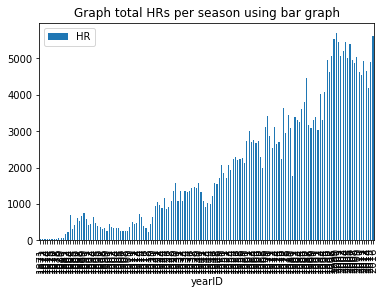

In [31]:
import matplotlib.pyplot as plt
%pylab inline
df.groupby('yearID').sum()[['HR']].plot(kind = 'bar', title = 'Total HRs per season using bar graph')

#### Bonus 2: Using a line graph please graph the average HRs per AB (think about this) per season

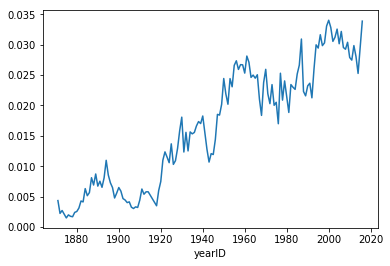

In [35]:
g = df.groupby('yearID').sum()
g['AverageHRs'] = g['HR']/g['AB']
g['AverageHRs'].plot()